# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
%matplotlib inline

import pandas as pd

df = pd.read_csv('/Users/jj/PycharmProjects/springboard2/Human Body Temperature/data/human_body_temperature.csv')

In [34]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

### Is the distribution of body temperatures normal?


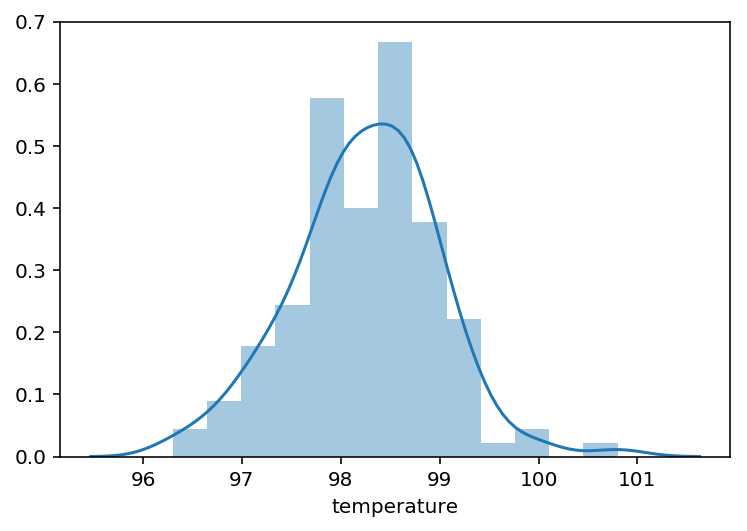

In [39]:
sb.distplot(df.temperature)

In [40]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Scipy.stats.normaltest tests the null hypothesis that a sample comes from a normal distribution based on D'Agostino and Pearsons test. 
p value of 0.25 which is greater than 0.05 and **do not** reject null hypothesis. 
Which concludes that this data is **Normally distributed**. 



### Is the population mean == 98.6?


#### Z test

In [41]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

* The p value is around 4.9 * 10^-8 which is very small.  I can safely reject the null hypothesis (mean == 98.6). 




#### t-test

In [43]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

- The p value is also small.  I can safely reject the null hypothesis (mean==98.6). 


### At what temperature should we consider someone's temperature to be 'abnormal'?


95% confidence interval would be enough. 
The Margin of Error is Critical value * standard error
Critical Value = 1.96 


In [49]:
se = df.temperature.std()/np.sqrt(len(df))
me = se * 1.96
ci = [df.temperature.mean()-me, df.temperature.mean() + me]
ci

[98.123194112228489, 98.375267426233009]

In [52]:
stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std()/np.sqrt(len(df)))

(98.123196428181629, 98.375265110279869)

In [53]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Is there a significant difference between males and females in normal temperature?

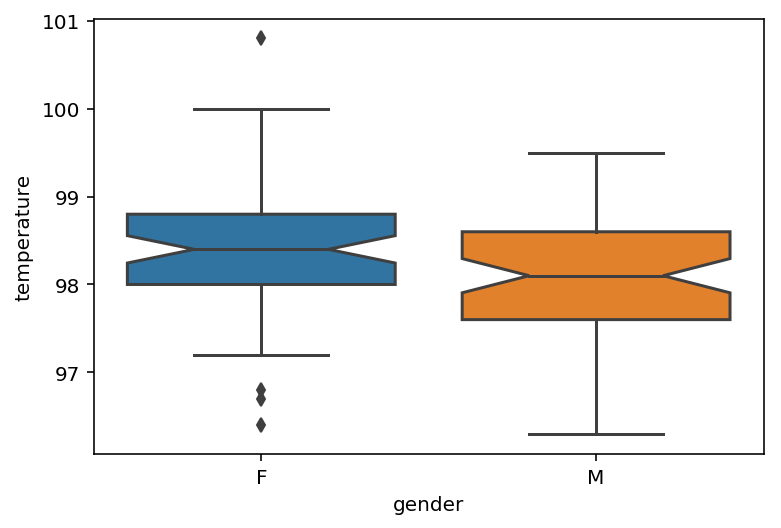

In [33]:
sb.boxplot(y=df.temperature, x=df.gender, notch=True)

In [55]:
stats.ttest_ind(df.temperature[df.gender == 'F'], df.temperature[df.gender == 'M'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

Scipy.stats.ttest_ind is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

p value is less than 0.05 can reject null hypothesis(2 samples have same average) and accepts alternate hypothesis. 

